In [2]:
import os
import pandas as pandas
from database.query import sql_query
import matplotlib.pyplot as pyplot

pyplot.rcParams['figure.figsize'] = (15, 7)

In [29]:
flights = pandas.read_csv('data-csv/flights.csv')
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01T06:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,,1455,,,1634,,9E,3393,,JFK,DCA,,213,14,55,2013-09-30T14:00:00Z
336772,2013,9,30,,2200,,,2312,,9E,3525,,LGA,SYR,,198,22,0,2013-09-30T22:00:00Z
336773,2013,9,30,,1210,,,1330,,MQ,3461,N535MQ,LGA,BNA,,764,12,10,2013-09-30T12:00:00Z
336774,2013,9,30,,1159,,,1344,,MQ,3572,N511MQ,LGA,CLE,,419,11,59,2013-09-30T11:00:00Z


In [30]:
airports = pandas.read_csv('data-csv/airports.csv')
airports

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
...,...,...,...,...,...,...,...,...
1453,ZUN,Black Rock,35.083228,-108.791778,6454,-7,A,America/Denver
1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A,America/New_York
1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A,America/New_York
1456,ZWU,Washington Union Station,38.897460,-77.006430,76,-5,A,America/New_York


In [31]:
airlines = pandas.read_csv('data-csv/airlines.csv')
airlines

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [32]:
planes = pandas.read_csv('data-csv/planes.csv')
planes

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,,Turbo-fan
1,N102UW,1998,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,,Turbo-fan
2,N103US,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,,Turbo-fan
3,N104UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,,Turbo-fan
4,N10575,2002,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3317,N997AT,2002,Fixed wing multi engine,BOEING,717-200,2,100,,Turbo-fan
3318,N997DL,1992,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,,Turbo-fan
3319,N998AT,2002,Fixed wing multi engine,BOEING,717-200,2,100,,Turbo-fan
3320,N998DL,1992,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,,Turbo-jet


In [33]:
weather = pandas.read_csv('data-csv/weather.csv')
weather

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230,10.357019999999999,11.918651475599997,0.0,1013.9,10.0,2013-01-01T00:00:00Z
1,EWR,2013,1,1,1,37.04,21.92,53.97,230,13.809359999999998,15.891535300799996,0.0,1013,10.0,2013-01-01T01:00:00Z
2,EWR,2013,1,1,2,37.94,21.92,52.09,230,12.658579999999999,14.567240692399997,0.0,1012.6,10.0,2013-01-01T02:00:00Z
3,EWR,2013,1,1,3,37.94,23,54.51,230,13.809359999999998,15.891535300799996,0.0,1012.7,10.0,2013-01-01T03:00:00Z
4,EWR,2013,1,1,4,37.94,24.08,57.04,240,14.960139999999999,17.215829909199996,0.0,1012.8,10.0,2013-01-01T04:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26125,LGA,2013,12,30,19,35.96,19.94,51.78,340,13.809359999999998,15.891535300799996,0.0,1017.1,10.0,2013-12-30T19:00:00Z
26126,LGA,2013,12,30,20,33.98,17.06,49.51,330,17.261699999999998,19.864419125999994,0.0,1018.8,10.0,2013-12-30T20:00:00Z
26127,LGA,2013,12,30,21,32,15.08,49.19,340,14.960139999999999,17.215829909199996,0.0,1019.5,10.0,2013-12-30T21:00:00Z
26128,LGA,2013,12,30,22,30.92,12.92,46.74,320,17.261699999999998,19.864419125999994,0.0,1019.9,10.0,2013-12-30T22:00:00Z


2) Combien y-a-t-il d’aéroports, de compagnies, de destinations, d’avions et de fuseaux horaires ?

In [34]:
count_airports = sql_query("SELECT COUNT(faa) FROM airport;")[0][0]
print(f"Il y a {count_airports} aéroports.")

count_airlines = sql_query("SELECT COUNT(carrier) FROM airline;")[0][0]
print(f"Il y a {count_airlines} companies.")

count_dest = sql_query("SELECT COUNT(DISTINCT dest) FROM flight;")[0][0]
print(f"Il y a {count_dest} destinations.")

count_planes = sql_query("SELECT COUNT(tailnum) FROM plane;")[0][0]
print(f"Il y a {count_planes} avions.")

count_tz = sql_query("SELECT COUNT(DISTINCT tz) FROM airport;")[0][0]
print(f"Il y a {count_tz} fuseaux horaires.")

Il y a 1462 aéroports.
Il y a 16 companies.
Il y a 105 destinations.
Il y a 4043 avions.
Il y a 7 fuseaux horaires.


3) Combien y-a-t-il de zones aux Etats-Unis où on ne passe pas à l’heure d’été (indice : colonne dst) ?

In [35]:
count_zones = sql_query("SELECT count(DISTINCT tzone) FROM airport WHERE dst = 'N';")[0][0]
print(f"Il y a {count_zones} zones aux Etats-Unis où on ne passe pas à l’heure d’été.")

Il y a 4 zones aux Etats-Unis où on ne passe pas à l’heure d’été.


4) Quel est l’aéroport de départ le plus emprunté ? Quelles sont les 10 destinations les plus (moins) prisées ? Quelle sont les 10 avions qui ont le plus (moins) décollé ?

In [107]:
better_airport_faa = sql_query(
    "SELECT origin FROM flight GROUP BY origin ORDER BY COUNT(id) DESC LIMIT 1;"
)[0][0]
better_airport = sql_query('SELECT ap.name FROM airport AS ap WHERE ap.faa = %s', (better_airport_faa))[0][0]
print(f"L'aéroport de départ le plus emprunté est {better_airport}.")

def get_top_dest(desc=True, limit=10):
    top_ten_dest_faa = [cols[0] for cols in sql_query(
        f"SELECT dest FROM flight GROUP BY dest ORDER BY COUNT(id) {'DESC' if desc else 'ASC'} LIMIT {limit};"
    )]
    top_ten_dest = [cols[0] for cols in sql_query(
        'SELECT ap.name FROM airport AS ap WHERE ap.faa IN ('
            + ','.join(['%s' for _ in top_ten_dest_faa])
            + ');', 
        top_ten_dest_faa
    )]
    return ', '.join(top_ten_dest)

print(f"Les 10 destinations les plus prisées sont {get_top_dest()}.")
print(f"Les 10 destinations les moins prisées sont {get_top_dest(desc=False)}.")

def get_top_planes(desc=True, limit=10):
    top_ten_plane = [cols[0] for cols in sql_query(
        f"SELECT tailnum FROM flight WHERE tailnum IS NOT NULL GROUP BY dest ORDER BY COUNT(id) {'DESC' if desc else 'ASC'} LIMIT {limit};"
    )]
    print('sql_query', sql_query(f"SELECT tailnum FROM flight WHERE tailnum IS NOT NULL GROUP BY tailnum ORDER BY COUNT(id) {'DESC' if desc else 'ASC'} LIMIT {limit};"))
    return ', '.join(top_ten_plane)

print(f"Les 10 avions qui ont le plus décollés sont {get_top_planes()}.")
print(f"Les 10 avions qui ont le moins décollés sont {get_top_planes(desc=False)}.")



L'aéroport de départ le plus emprunté est Newark Liberty Intl.
Les 10 destinations les plus prisées sont Hartsfield Jackson Atlanta Intl, General Edward Lawrence Logan Intl, Charlotte Douglas Intl, Ronald Reagan Washington Natl, Fort Lauderdale Hollywood Intl, Los Angeles Intl, Orlando Intl, Miami Intl, Chicago Ohare Intl, San Francisco Intl.
Les 10 destinations les moins prisées sont Ted Stevens Anchorage Intl, Gallatin Field, Key West Intl, Yampa Valley, Jackson Hole Airport, Blue Grass, La Guardia, Montrose Regional Airport, Palm Springs Intl, South Bend Rgnl.
sql_query (('N725MQ',), ('N722MQ',), ('N723MQ',), ('N711MQ',), ('N713MQ',), ('N258JB',), ('N298JB',), ('N353JB',), ('N351JB',), ('N735MQ',))
Les 10 avions qui ont le plus décollés sont N668DN, N39463, N29129, N708JB, N593JB, N426US, N53441, N516JB, N619AA, N846MQ.
sql_query (('N820AW',), ('N928EV',), ('N978SW',), ('N595NW',), ('N648UA',), ('N3LFAA',), ('N837AW',), ('N587NW',), ('N3LDAA',), ('N819AW',))
Les 10 avions qui ont le

5) Trouver combien chaque compagnie a desservi de destination ? 
Réaliser les graphiques adéquats qui synthétisent ces informations.

In [37]:
count_dest = sql_query(
    "SELECT airline.name, COUNT(flight.dest) FROM flight " + \
    "INNER JOIN airline ON flight.carrier = airline.carrier " + \
    "GROUP BY flight.carrier;"
)
airlines_dests = pandas.DataFrame(count_dest, columns=['Compagnie', 'Nombre de destination'])
airlines_dests

,Compagnie,Nombre de destination
0,Endeavor Air Inc.,18460
1,American Airlines Inc.,32729
2,Alaska Airlines Inc.,714
3,JetBlue Airways,54635
4,Delta Air Lines Inc.,48110
5,ExpressJet Airlines Inc.,54173
6,Frontier Airlines Inc.,685
7,AirTran Airways Corporation,3260
8,Hawaiian Airlines Inc.,342
9,Envoy Air,26397


<AxesSubplot:title={'center':'Nombre de destinations desservies par compagnies'}, xlabel='Compagnie'>

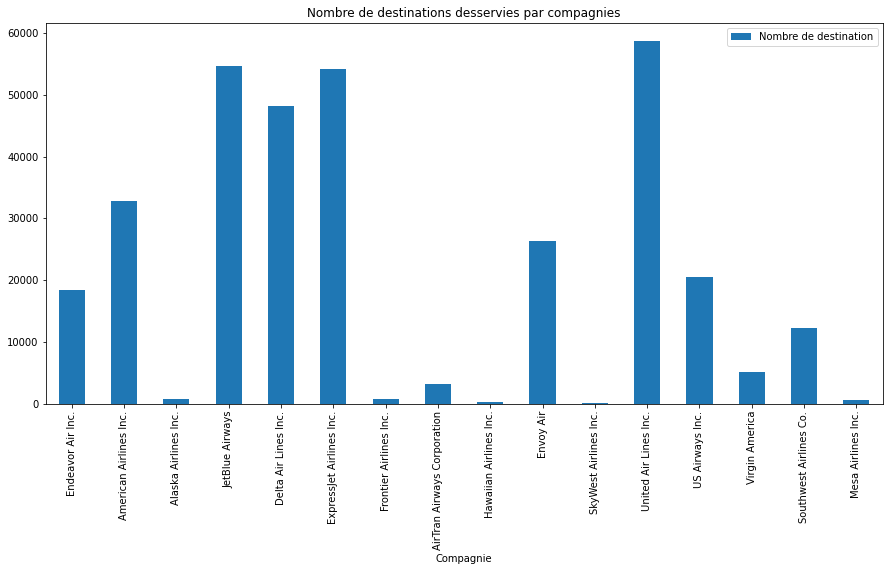

In [38]:
airlines_dests.plot.bar(title='Nombre de destinations desservies par compagnies', x='Compagnie', y='Nombre de destination')

5 bis) Combien chaque compagnie a desservie de destination par aéroport d’origine? Réaliser les graphiques adéquats qui synthétisent ces informations.

In [39]:
count_dests_per_oringins = sql_query(
    "SELECT airline.name, airport.name, COUNT(flight.dest) FROM flight " + \
    "INNER JOIN airline ON flight.carrier = airline.carrier " + \
    "INNER JOIN airport ON flight.origin = airport.faa " + \
    "GROUP BY flight.carrier, flight.origin;"
)
airlines_dests_per_oringins = pandas.DataFrame(count_dests_per_oringins, columns=['Compagnie', 'Origine', 'Nombre de destination'])
airlines_dests_per_oringins

,Compagnie,Origine,Nombre de destination
0,Endeavor Air Inc.,Newark Liberty Intl,1268
1,Endeavor Air Inc.,John F Kennedy Intl,14651
2,Endeavor Air Inc.,La Guardia,2541
3,American Airlines Inc.,Newark Liberty Intl,3487
4,American Airlines Inc.,John F Kennedy Intl,13783
5,American Airlines Inc.,La Guardia,15459
6,Alaska Airlines Inc.,Newark Liberty Intl,714
7,JetBlue Airways,Newark Liberty Intl,6557
8,JetBlue Airways,John F Kennedy Intl,42076
9,JetBlue Airways,La Guardia,6002


<AxesSubplot:title={'center':'Nombre de destinations desservies par compagnies et origines'}, xlabel='Compagnie-Origine'>

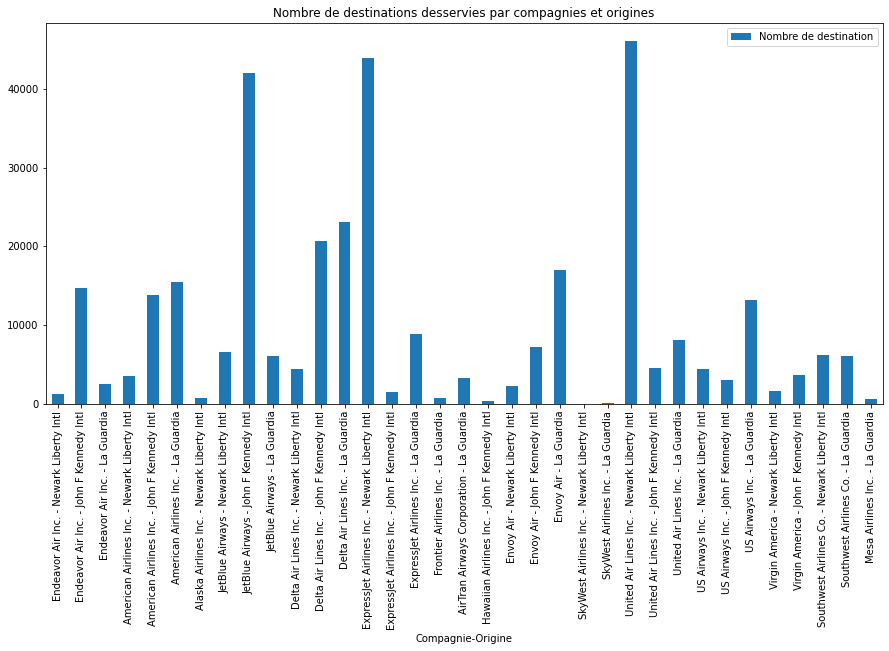

In [40]:
airlines_dests_per_oringins['Compagnie-Origine'] = airlines_dests_per_oringins[['Compagnie', 'Origine']].apply(lambda x: ' - '.join(x), axis=1)
airlines_dests_per_oringins.plot.bar(title='Nombre de destinations desservies par compagnies et origines', x='Compagnie-Origine', y='Nombre de destination')

6.1) Trouver tous les vols ayant atterri à Houston (IAH ou HOU) (indice : 9313 vols) ?

In [41]:
to_houston_flights = sql_query("SELECT flight, origin, dest, time_hour FROM flight WHERE dest = 'IAH' OR dest = 'HOU' ORDER BY flight.flight;")
pandas.DataFrame(to_houston_flights, columns=["Numéro de vol", "Origine", "Destination", "Date horaire"])

,Numéro de vol,Origine,Destination,Date horaire
0,10,LGA,IAH,2013-01-04 07:00:00
1,10,LGA,IAH,2013-01-07 07:00:00
2,10,LGA,IAH,2013-01-10 07:00:00
3,10,LGA,IAH,2013-01-11 07:00:00
4,10,LGA,IAH,2013-01-14 07:00:00
...,...,...,...,...
9308,997,LGA,IAH,2013-03-17 07:00:00
9309,997,LGA,IAH,2013-03-24 07:00:00
9310,999,LGA,IAH,2013-06-09 12:00:00
9311,999,EWR,IAH,2013-06-16 17:00:00


6.2) Combien de vols partent de NYC airports vers Seattle (indice : 3923 vols) ?

In [46]:
count_flights = sql_query("SELECT COUNT(flight) FROM flight WHERE (origin = 'JFK' OR origin = 'EWR' OR origin = 'LGA') AND dest = 'SEA';")[0][0]
print(f"Il y a {count_flights} vols de NYC à Seattle.")

Il y a 3923 vols de NYC à Seattle.


6.3) Combien de compagnies desservent cette destination (indice : 5 compagnies) ?

In [49]:
count_flights = sql_query("SELECT COUNT(DISTINCT carrier) FROM flight WHERE dest = 'SEA';")[0][0]
print(f"{count_flights} compagnies desservent Seattle.")

5 compagnies desservent Seattle.


6.4) Combien d’avions “uniques” (indice : 935 avions) ?

In [50]:
count_flights = sql_query("SELECT COUNT(DISTINCT tailnum) FROM flight WHERE dest = 'SEA';")[0][0]
print(f"Il y a {count_flights} avions uniques pour Seattle.")


Il y a 935 avions uniques pour Seattle.


7)Trouver le nombre de vols unique par destination voir l’aperçu. 

In [7]:
count_flight_by_dest = sql_query(
    "SELECT airport.name, COUNT(DISTINCT flight.flight) as counter FROM flight " + \
    "INNER JOIN airport ON flight.dest = airport.faa " + \
    "GROUP BY flight.dest ORDER BY counter DESC;"
)
pandas.DataFrame(count_flight_by_dest, columns=['Destination', 'Nombre de vols uniques'])

,Destination,Nombre de vols uniques
0,Chicago Ohare Intl,17283
1,Hartsfield Jackson Atlanta Intl,17215
2,Los Angeles Intl,16174
3,General Edward Lawrence Logan Intl,15508
4,Orlando Intl,14082
...,...,...
100,Yampa Valley,15
101,South Bend Rgnl,10
102,Ted Stevens Anchorage Intl,8
103,Blue Grass,1


7bis) Trier les vols suivant la destination, l’aéroport d’origine, la compagnie dans un ordre alphabétique croissant (en réalisant les jointures nécessaires pour obtenir les noms des explicites des aéroports) ?

In [4]:
count_flight_by_dest = sql_query(
    "SELECT f.flight, ap1.name, ap2.name, al.name FROM flight AS f " + \
    "LEFT JOIN airport AS ap1 ON f.dest = ap1.faa " + \
    "LEFT JOIN airport AS ap2 ON f.origin = ap2.faa " + \
    "LEFT JOIN airline AS al ON al.carrier = f.carrier " + \
    "ORDER BY ap1.name, ap2.name, al.name;"
)
pandas.DataFrame(count_flight_by_dest, columns=['Vol', 'Destination', 'Origine', 'Compagnie'])


,Vol,Destination,Origine,Compagnie
0,353,Akron Canton Regional Airport,La Guardia,AirTran Airways Corporation
1,354,Akron Canton Regional Airport,La Guardia,AirTran Airways Corporation
2,353,Akron Canton Regional Airport,La Guardia,AirTran Airways Corporation
3,354,Akron Canton Regional Airport,La Guardia,AirTran Airways Corporation
4,353,Akron Canton Regional Airport,La Guardia,AirTran Airways Corporation
...,...,...,...,...
336771,4517,Yeager,La Guardia,Envoy Air
336772,4517,Yeager,La Guardia,Envoy Air
336773,4517,Yeager,La Guardia,Envoy Air
336774,4517,Yeager,La Guardia,Envoy Air


8) Quelles sont les compagnies qui n'opèrent pas sur tous les aéroports d’origine ? Quelles sont les compagnies qui desservent l’ensemble de destinations ?
Faire un tableau où l’on récupère l’ensemble des origines et des destinations pour l’ensemble des compagnies

In [26]:
count_origin = sql_query('SELECT COUNT(DISTINCT origin) FROM flight')[0][0]
origin_airports = [cols[0] for cols in sql_query(
    "SELECT al.name FROM airline AS al " + \
    "INNER JOIN (" + \
        "SELECT carrier, COUNT(DISTINCT origin) AS c FROM flight " + \
        "GROUP BY carrier ORDER BY origin" + \
    ") AS i " + \
    "ON al.carrier = i.carrier WHERE i.c != %s;", 
    (count_origin)
)]
print(f"les compagnies qui n'opèrent pas sur tous les aéroports d’origine sont {', '.join(origin_airports)}.")

les compagnies qui n'opèrent pas sur tous les aéroports d’origine sont Alaska Airlines Inc., Frontier Airlines Inc., AirTran Airways Corporation, Hawaiian Airlines Inc., SkyWest Airlines Inc., Virgin America, Southwest Airlines Co., Mesa Airlines Inc..


In [ ]:
%sql

#les compagnies qui n'opèrent pas sur tous les aéroports d’origine
SELECT airlines.carrier
from airlines
WHERE airlines.carrier NOT IN(SELECT flights.carrier from flights WHERE );

#les compagnies qui desservent l’ensemble des destinations
SELECT airlines.carrier
from airlines
WHERE airlines.carrier IN(SELECT flights.dest from flights);

#tableau
SELECT COUNT(flights.origin) AS "nb_origin", flights.carrier, airlines.name, COUNT(fligths.dest)
from flights
INNER JOIN airlines ON airlines.carrier = flights.carrier
GROUP BY flights.carrier;


9) Quelles sont les destinations qui sont exclusives à certaines compagnies

In [ ]:
%sql

SELECT airports.name
from airports 
WHERE airports.name IN(SELECT flights.dest from dest);

10) Filtrer le vol pour trouver ceux exploités par United, American ou Delta

In [ ]:
%sql

SELECT flight, 
FILTER(WHERE carrier = 
from flights
